In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
(4e4 * 4e4 * 4) / 1e9

6.4

In [15]:
np.ones(5) @ np.linspace(1, 5, 5)

SyntaxError: invalid syntax (<ipython-input-15-3176e475f091>, line 1)

In [2]:
u0 = lambda x: 5*x
N_x = 10000
N_t = 10000
N = 40000
eps = 1e-6
x = np.linspace(-10, 10, N)
u0 = 5 * x
t = np
h_x = (10. - (-10)) / N_x
h_t = 10./N_t

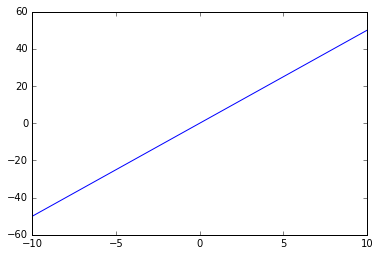

In [16]:
plt.plot(x, u0)

$ \frac{du}{dt} + \frac{du}{dx} = 0 $

$ \frac{u(x_i, t_i + h_t) - u(x_i, t_i)}{h_t} + \frac{u(x_i + h_x, t_i) - u(x_i, t_i)}{h_x} = 0 $

$ u(x_i, 0) = x_{i}^2 $

$ 0 < t < 10 $

$ -10 < x < 10 $

$ i = 0..N $

$ f = \sum{\frac{u(x_i, t_j + h_t) - u(x_i, t_j)}{h_t} + \frac{u(x_i + h_x, t_j) - u(x_i, t_j)}{h_x}} $



In [17]:
A = np.zeros((100, 100))
b = np.zeros(N_x)
A.shape

(100L, 100L)

In [18]:
U = np.zeros((N_x, N_x))
U[:, 0] = u0
plt.plot(x, U[:,0])

ValueError: could not broadcast input array from shape (40000) into shape (10000)

In [19]:
for k in range(1, N_t):
    for i in range(N_x-1):
        A[i, i] = 1. / h_t
        b[i] = U[i, k-1] - U[i+1, k]

IndexError: index 100 is out of bounds for axis 0 with size 100

In [3]:
def f(U_prev):
    def foo(U):
        f1 = ((U - U_prev) / h_t)
        f2 = np.zeros(N_x)
#         for i in range(N_x-1):
#             f2[i] = ((U_prev[i+1] - U_prev[i]) / h_x)
        f2[:-1] = (U_prev[1:] - U_prev[:-1]) / h_x
#         print("\n",f1.sum(), f2.sum())
        return (abs(f1 + f2)).sum()
    return foo

In [21]:
x[:-1].shape

(39999L,)

In [4]:
x = np.array([h_x*i for i in range(N_x)])
loss = f(x)
temp = loss(x - h_t)

In [5]:
temp

1.0000000054909379

In [24]:
U[:, 0].shape

(10000L,)

In [25]:
N_x

10000

In [7]:
from scipy.optimize import minimize

In [8]:
%%time
res = minimize(loss, np.array(x))

Wall time: 2min 22s


In [9]:
(res.x - (x - h_t)).sum()

-2.5840592013238409e-05

In [10]:
res.x.shape

(10000L,)